# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [27]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, label_binarize
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from palmerpenguins import load_penguins
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [28]:
pd.get_dummies(penguins)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,2007,True,False,False,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,2007,True,False,False,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,2007,True,False,False,False,False,True,True,False
3,NaN,NaN,NaN,NaN,2007,True,False,False,False,False,True,False,False
4,36.7,19.3,193.0,3450.0,2007,True,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2009,False,True,False,False,True,False,False,True
340,43.5,18.1,202.0,3400.0,2009,False,True,False,False,True,False,True,False
341,49.6,18.2,193.0,3775.0,2009,False,True,False,False,True,False,False,True
342,50.8,19.0,210.0,4100.0,2009,False,True,False,False,True,False,False,True


Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

In [29]:
penguins = penguins.dropna()

In [30]:
X = penguins.drop(["species"], axis = 1)
y = penguins["species"]


ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False, handle_unknown='ignore'),make_column_selector(dtype_include=object)),
    ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
knn3 = Pipeline([
    ("preprocessing", ct),
    ("kNN_regression", KNeighborsClassifier(n_neighbors=3))]
)


knn3.fit(X_train, y_train)
y_pred_knn3 = knn3.predict(X_test)

print(confusion_matrix(y_test, y_pred_knn3))
print(classification_report(y_test, y_pred_knn3))


[[31  0  0]
 [ 0 18  0]
 [ 0  0 18]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        18
      Gentoo       1.00      1.00      1.00        18

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [32]:
knn7 = Pipeline([
    ("preprocess", ct),
    ("model", KNeighborsClassifier(n_neighbors=7))
])

knn7.fit(X_train, y_train)
y_pred_knn7 = knn7.predict(X_test)

print(confusion_matrix(y_test, y_pred_knn7))
print(classification_report(y_test, y_pred_knn7))


[[31  0  0]
 [ 0 18  0]
 [ 0  0 18]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        18
      Gentoo       1.00      1.00      1.00        18

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [33]:
dt3 = Pipeline([
    ("preprocess", ct),
    ("model", DecisionTreeClassifier(max_depth=3, random_state=42))
])

dt3.fit(X_train, y_train)
y_pred_dt3 = dt3.predict(X_test)

print(confusion_matrix(y_test, y_pred_dt3))
print(classification_report(y_test, y_pred_dt3))


[[31  0  0]
 [ 2 16  0]
 [ 0  0 18]]
              precision    recall  f1-score   support

      Adelie       0.94      1.00      0.97        31
   Chinstrap       1.00      0.89      0.94        18
      Gentoo       1.00      1.00      1.00        18

    accuracy                           0.97        67
   macro avg       0.98      0.96      0.97        67
weighted avg       0.97      0.97      0.97        67



In [34]:
dt_full = Pipeline([
    ("preprocess", ct),
    ("model", DecisionTreeClassifier(random_state=42))
])

dt_full.fit(X_train, y_train)
y_pred_dt_full = dt_full.predict(X_test)

print(confusion_matrix(y_test, y_pred_dt_full))
print(classification_report(y_test, y_pred_dt_full))


[[30  1  0]
 [ 0 18  0]
 [ 0  0 18]]
              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        31
   Chinstrap       0.95      1.00      0.97        18
      Gentoo       1.00      1.00      1.00        18

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.99        67
weighted avg       0.99      0.99      0.99        67



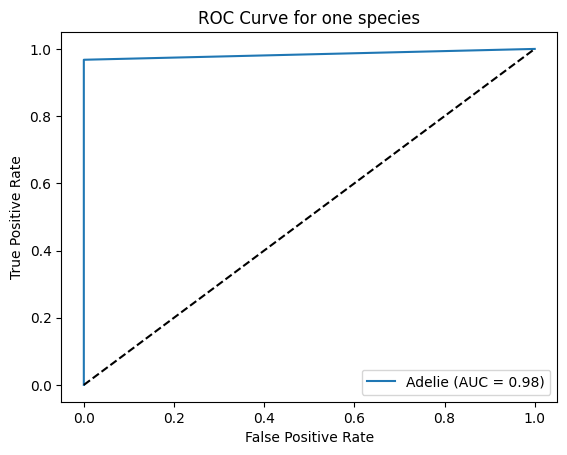

In [35]:
chosen_model = dt_full

y_score = chosen_model.predict_proba(X_test)

y_test_bin = label_binarize(y_test, classes=chosen_model.classes_)

species_index = 0
fpr, tpr, _ = roc_curve(y_test_bin[:, species_index], y_score[:, species_index])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"{chosen_model.classes_[species_index]} (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for one species")
plt.legend()
plt.show()
